In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns   


df = pd.read_csv("cs-training.csv")
print("First 5 rows of the dataset:")
print(df.info())

First 5 rows of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         120269 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  1

Review of missing data:

<Axes: >

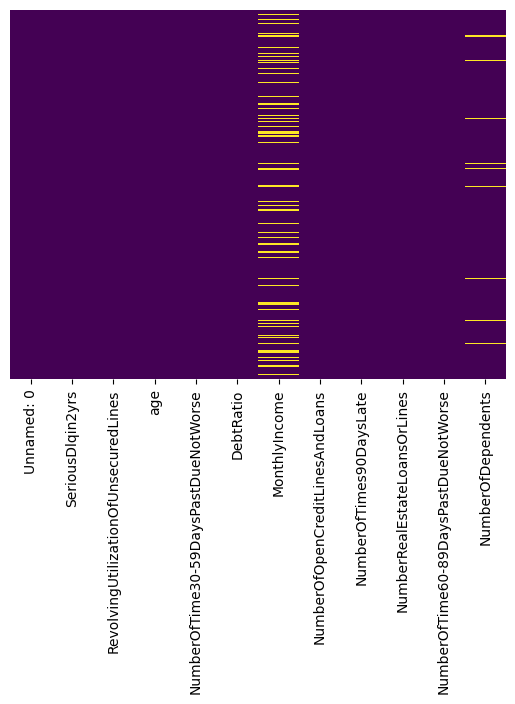

In [72]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Replace missing data by mean values:

In [ ]:
NoD_mean=df['NumberOfDependents'].mean().round()
df['NumberOfDependents'].fillna(NoD_mean,inplace=True)
print(NoD_mean)
#df['MonthlyIncome'].fillna(df['MonthlyIncome'].mean().round(),inplace=True)

1.0


C:\Users\elena\AppData\Local\Temp\ipykernel_784\2355302061.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['NumberOfDependents'].fillna(df['NumberOfDependents'].mean().round(),inplace=True)


Count mean constant of DebtRatio where MonthlyIncome is not null

In [74]:
df_Debt = df[df['MonthlyIncome'].isna()==False]
debt_mean = df_Debt['DebtRatio'].mean().round(9)



In [75]:
def replace_by_mean(cols):
    MonthlyIncome =cols[0]
    DebtRatio = cols[1]
    #mean_value = 26.598777445
    if pd.isnull(MonthlyIncome):
        return DebtRatio/2
    else:
        return DebtRatio

Replacing DebtRatio by mean number, when MonthlyIncome is null

In [76]:
df['DebtRatio'] = df[['MonthlyIncome','DebtRatio']].apply(replace_by_mean,axis=1)
df_mean = df['DebtRatio'].mean().round(9)
print(df_mean) #353

C:\Users\elena\AppData\Local\Temp\ipykernel_784\235988422.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  MonthlyIncome =cols[0]
C:\Users\elena\AppData\Local\Temp\ipykernel_784\235988422.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  DebtRatio = cols[1]


187.165899097


Filling Monthly Income missing data:

In [77]:
df['MonthlyIncome'] = df['MonthlyIncome'].fillna(df['MonthlyIncome'].median().round())


In [78]:
df.drop('Unnamed: 0',axis=1,inplace=True)

<Axes: >

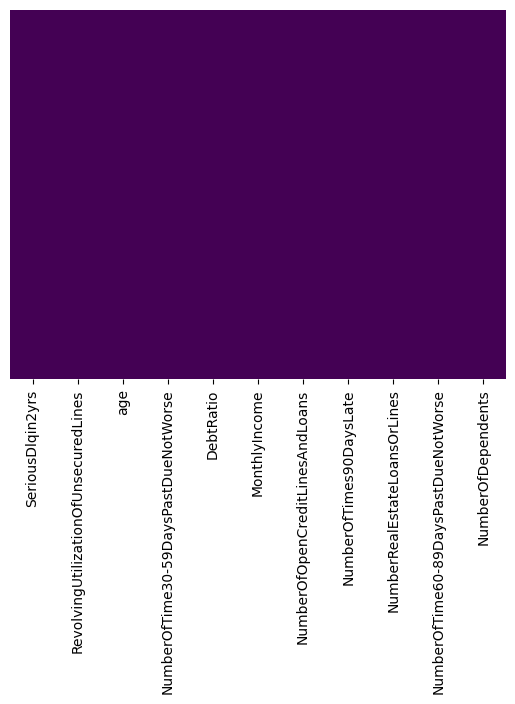

In [79]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

c:\Users\elena\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


<Axes: xlabel='DebtRatio', ylabel='Count'>

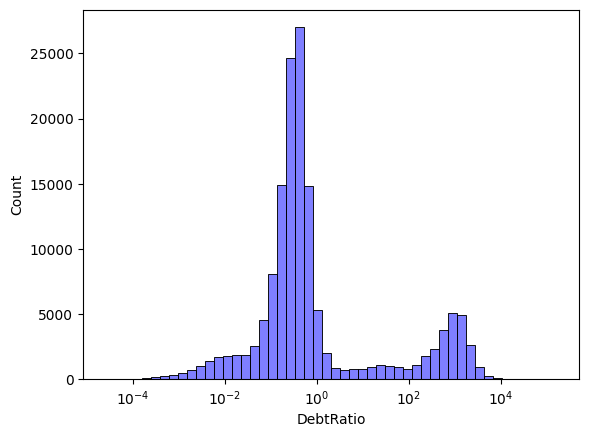

In [80]:
sns.histplot(data=df, x='DebtRatio', bins=50, kde=True, color='blue', log_scale=True)

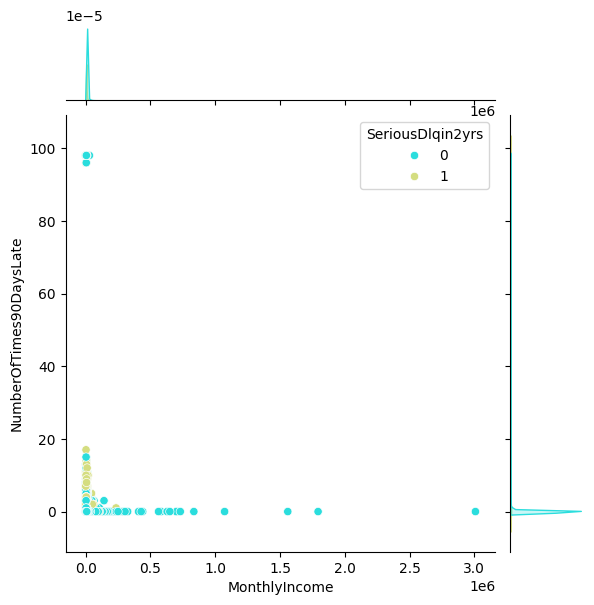

In [81]:
sns.jointplot(x="MonthlyIncome", y="NumberOfTimes90DaysLate", data=df,palette='rainbow', hue='SeriousDlqin2yrs')

Save the data for csv:

In [ ]:
df.to_csv('cs-training-processed.csv', index=False)

Scaling:

In [82]:
print(df.describe())

       SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines            age  \
count     150000.000000                         150000.000000  150000.000000   
mean           0.066840                              6.048438      52.295207   
std            0.249746                            249.755371      14.771866   
min            0.000000                              0.000000       0.000000   
25%            0.000000                              0.029867      41.000000   
50%            0.000000                              0.154181      52.000000   
75%            0.000000                              0.559046      63.000000   
max            1.000000                          50708.000000     109.000000   

       NumberOfTime30-59DaysPastDueNotWorse      DebtRatio  MonthlyIncome  \
count                         150000.000000  150000.000000   1.500000e+05   
mean                               0.421033     187.165899   6.418455e+03   
std                                4.192781    1

Scaling:

In [83]:
from sklearn.preprocessing import MinMaxScaler

In [84]:
scaler = MinMaxScaler()
scaler.fit(df.drop('SeriousDlqin2yrs',axis=1))
scaled_features = scaler.transform(df.drop('SeriousDlqin2yrs',axis=1))

In [85]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[1:])
df_feat.head()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0.000015,0.412844,0.020408,4.871518e-06,0.003031,0.224138,0.000000,0.111111,0.0,0.10
1,0.000019,0.366972,0.000000,7.393965e-07,0.000864,0.068966,0.000000,0.000000,0.0,0.05
2,0.000013,0.348624,0.010204,5.163644e-07,0.001011,0.034483,0.010204,0.000000,0.0,0.00
3,0.000005,0.275229,0.000000,2.187056e-07,0.001097,0.086207,0.000000,0.000000,0.0,0.00
4,0.000018,0.449541,0.010204,1.512188e-07,0.021134,0.120690,0.000000,0.018519,0.0,0.00


In [86]:
from sklearn.model_selection import train_test_split

In [87]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['SeriousDlqin2yrs'],
                                                    test_size=0.20)